In [ ]:
"""
GENERAL NOTE: Please print out numbers (i.e., accuracies, plots, etc.) so they are visible without me having to run your colab notebook. Use python's print() function.
"""

# import everything you might need

import torch
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import pandas as pd
from xgboost import XGBClassifier
import random
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

**QUESTION 1**

In [ ]:
"""
Q1: Calculate the gradient of the f(x, y, z) = 7x2z – 2xy3 + 5z at (-1, -2, 3). What does this vector represent?

The gradient of f is [14xz-2y^3, -6xy^2, 7x^2+5].
The gradient of f at point (-1, -2, 3) is [14(-1)(3)-2(-2)^3, -6(-1)(-2)^2, 7(-1)^2+5] = [-26, 24, 12].
This vector represents the direction of steepest ascent of the function at point (-1, -2, 3).
When using gradient descent, we take its negative to reach a local minimum of the loss function.
"""

'\nQ1: Calculate the gradient of the f(x, y, z) = 7x2z – 2xy3 + 5z at (-1, -2, 3). What does this vector represent?\n\nThe gradient of f is [14xz-2y^3, -6xy^2, 7x^2+5].\nThe gradient of f at point (-1, -2, 3) is [14(-1)(3)-2(-2)^3, -6(-1)(-2)^2, 7(-1)^2+5] = [-26, 24, 12].\nThis vector represents the direction of steepest ascent of the function at point (-1, -2, 3).\nWhen using gradient descent, we take its negative to reach a local minimum of the loss function.\n'

**QUESTION 2**

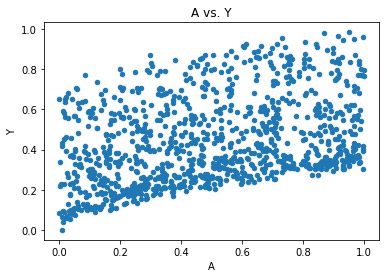

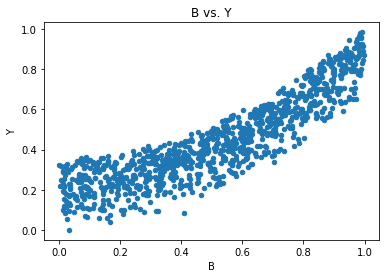

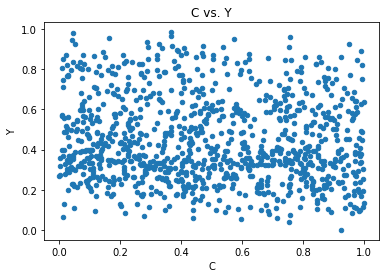

In [ ]:
"""
Q2a: Use pandas to load train.csv, val.csv, and test.csv into three separate dataframes. Then, create three scatter plots of the train set with features A, B, and C on the x-axes and Y on the y-axes.
"""
# Read CSV files into dataframes
train_df = pd.read_csv('https://github.com/jrgreen7/SYSC4906/releases/download/Ass1/train.csv')
val_df = pd.read_csv('https://github.com/jrgreen7/SYSC4906/releases/download/Ass1/val.csv')
test_df = pd.read_csv('https://github.com/jrgreen7/SYSC4906/releases/download/Ass1/test.csv')

# Plot dataframes
train_df.plot(kind='scatter', x='A', y='Y')
plt.title("A vs. Y")
plt.show()
train_df.plot(kind='scatter', x='B', y='Y')
plt.title("B vs. Y")
plt.show()
train_df.plot(kind='scatter', x='C', y='Y')
plt.title("C vs. Y")
plt.show()

In [ ]:
"""
Q2b: If you were using A, B, and C to predict Y (i.e., using linear regression), how well do you think these features would perform? Do you think nonlinear functions would fit the data better? Why or why not?

Linear regression would perform reasonably well since all three features are relatively linear.
However, nonlinear functions would fit the data better since features A and B are slightly nonlinear (sqrt and polynomial respectively).
"""

'\nQ2b: If you were using A, B, and C to predict Y (i.e., using linear regression), how well do you think these features would perform? Do you think nonlinear functions would fit the data better? Why or why not?\n\nLinear regression would perform reasonably well since all three features are relatively linear.\nHowever, nonlinear functions would fit the data better since features A and B are slightly nonlinear (sqrt and polynomial respectively).\n'

In [ ]:
"""
Q2c: The data is already normalized, how can you tell?

The data falls within the range [0, 1] which indicates that it has been normalized (excluding the binned classes 0 - 9).
"""
# Min/Max of train set
print('Train set max A = {}'.format(max(train_df['A'])))
print('Train set max B = {}'.format(max(train_df['B'])))
print('Train set max C = {}'.format(max(train_df['C'])))
print('Train set max Y = {}'.format(max(train_df['Y'])))
print('Train set min A = {}'.format(min(train_df['A'])))
print('Train set min B = {}'.format(min(train_df['B'])))
print('Train set min C = {}'.format(min(train_df['C'])))
print('Train set min Y = {}'.format(min(train_df['Y'])))

# Min/Max of validation set
print('Val set max A = {}'.format(max(val_df['A'])))
print('Val set max B = {}'.format(max(val_df['B'])))
print('Val set max C = {}'.format(max(val_df['C'])))
print('Val set max Y = {}'.format(max(val_df['Y'])))
print('Val set min A = {}'.format(min(val_df['A'])))
print('Val set min B = {}'.format(min(val_df['B'])))
print('Val set min C = {}'.format(min(val_df['C'])))
print('Val set min Y = {}'.format(min(val_df['Y'])))

# Min/Max of test set
print('Test set max A = {}'.format(max(test_df['A'])))
print('Test set max B = {}'.format(max(test_df['B'])))
print('Test set max C = {}'.format(max(test_df['C'])))
print('Test set max Y = {}'.format(max(test_df['Y'])))
print('Test set min A = {}'.format(min(test_df['A'])))
print('Test set min B = {}'.format(min(test_df['B'])))
print('Test set min C = {}'.format(min(test_df['C'])))
print('Test set min Y = {}'.format(min(test_df['Y'])))

Train set max A = 0.9982295036315918
Train set max B = 0.9970993399620056
Train set max C = 0.9998052716255188
Train set max Y = 0.9841378331184388
Train set min A = 9.96202725218609e-05
Train set min B = 0.0
Train set min C = 0.0001083232054952
Train set min Y = 0.0
Val set max A = 0.9984610676765442
Val set max B = 0.9967607855796814
Val set max C = 1.0
Val set max Y = 1.0
Val set min A = 0.003030638443306
Val set min B = 0.00112139666453
Val set min C = 0.0014540720731019
Val set min Y = 0.0132349990308284
Test set max A = 1.0
Test set max B = 1.0
Test set max C = 0.9996346235275269
Test set max Y = 0.9947332143783568
Test set min A = 0.0
Test set min B = 0.0001883903314592
Test set min C = 0.0
Test set min Y = 0.004510807339102


In [ ]:
"""
Q2d: For each of the three input features, compute its square-root to create 3 additional features. Repeat for squaring the feature values to create another 3 features.
You now have 9 total input features: A, B, C, sqrt(A), sqrt(B), sqrt(C), A2, B2, C2. 
Do this for all three data splits (train, val, and test). You can think of these as polynomial kernels used in SVMs.
"""
# Add features to training set
train_df['sqrt(A)'] = np.sqrt(train_df['A'])
train_df['sqrt(B)'] = np.sqrt(train_df['B'])
train_df['sqrt(C)'] = np.sqrt(train_df['C'])
train_df['A2'] = np.square(train_df['A'])
train_df['B2'] = np.square(train_df['B'])
train_df['C2'] = np.square(train_df['C'])

# Add features to validation set
val_df['sqrt(A)'] = np.sqrt(val_df['A'])
val_df['sqrt(B)'] = np.sqrt(val_df['B'])
val_df['sqrt(C)'] = np.sqrt(val_df['C'])
val_df['A2'] = np.square(val_df['A'])
val_df['B2'] = np.square(val_df['B'])
val_df['C2'] = np.square(val_df['C'])

# Add features to test set
test_df['sqrt(A)'] = np.sqrt(test_df['A'])
test_df['sqrt(B)'] = np.sqrt(test_df['B'])
test_df['sqrt(C)'] = np.sqrt(test_df['C'])
test_df['A2'] = np.square(test_df['A'])
test_df['B2'] = np.square(test_df['B'])
test_df['C2'] = np.square(test_df['C'])

# Print heads of the 3 datasets to show the new features
print(train_df.head(5))
print(val_df.head(5))
print(test_df.head(5))

          A         B         C         Y  Label   sqrt(A)   sqrt(B)  \
0  0.433429  0.684660  0.100264  0.554477      5  0.658353  0.827442   
1  0.596584  0.427275  0.972302  0.344430      3  0.772389  0.653663   
2  0.884875  0.566586  0.014994  0.555790      5  0.940678  0.752719   
3  0.145045  0.427584  0.756287  0.228959      2  0.380848  0.653899   
4  0.237964  0.684935  0.348287  0.481648      4  0.487816  0.827608   

    sqrt(C)        A2        B2        C2  
0  0.316645  0.187861  0.468759  0.010053  
1  0.986054  0.355913  0.182564  0.945371  
2  0.122450  0.783005  0.321020  0.000225  
3  0.869648  0.021038  0.182828  0.571970  
4  0.590159  0.056627  0.469136  0.121304  
          A         B         C         Y  Label   sqrt(A)   sqrt(B)  \
0  0.225478  0.417502  0.658253  0.261007      2  0.474845  0.646144   
1  0.730810  0.025166  0.219302  0.300882      2  0.854874  0.158637   
2  0.098021  0.858857  0.857660  0.568094      5  0.313084  0.926745   
3  0.906471  0.

**QUESTION 3**

In [ ]:
"""
Q3a: Train a linear regression model on the train set using only the 3 original input features.
"""
# Train linear regression model using 3 original input features
train_x = train_df[['A', 'B', 'C']]
train_y = train_df['Y']
model = LinearRegression().fit(train_x, train_y)

In [ ]:
"""
Q3b: What are the mean absolute errors of the train set, val set, and test sets using this model? Did the model overfit the train set?

Mean Absolute Errors:
Training Set = 0.04297622772687733
Validation Set = 0.042993924495539175
Test Set = 0.04199595732420805

The model did not overfit the train set since the test set MAE is low.
"""
val_x = val_df[['A', 'B', 'C']]
val_y = val_df['Y']
test_x = test_df[['A', 'B', 'C']]
test_y = test_df['Y']

# Print MAEs for all 3 datasets
print('Train set MAE = {}'.format(mean_absolute_error(train_y, model.predict(train_x))))
print('Val set MAE = {}'.format(mean_absolute_error(val_y, model.predict(val_x))))
print('Test set MAE = {}'.format(mean_absolute_error(test_y, model.predict(test_x))))

Train set MAE = 0.04297622772687733
Val set MAE = 0.042993924495539175
Test set MAE = 0.04199595732420805


In [ ]:
"""
Q3c: What are the values of the 4 learned parameters (3 weights and 1 bias)? Do these values make sense given your scatter plots in Q2a?

Values of learned parameters:
w0 (A) = 0.26851498621856407
w1 (B) = 0.6643599468825222
w2 (C) = -0.06032161768730915
b (bias) = 0.0030530675285197484

The learned parameters make sense based on the scatter plots obtained in Q2a.
The plots for features A, B, and C had slopes of approximately 0.27, 0.66, and 0 respectively.
The data in the scatter plots also seemed to go through the y-intercept at y=0 with the exception of feature C.
This is because feature C is weakly correlated to the output Y, and therefore has little significance for predicting Y.
"""
weights = model.coef_
bias = model.intercept_

# Print learned parameters
print('w0 (A) = {}'.format(weights[0]))
print('w1 (B) = {}'.format(weights[1]))
print('w2 (C) = {}'.format(weights[2]))
print('b (bias) = {}'.format(bias))

w0 (A) = 0.26851498621856407
w1 (B) = 0.6643599468825222
w2 (C) = -0.06032161768730915
b (bias) = 0.0030530675285197484


In [ ]:
"""
Q3d: Train another linear regression model using all 9 input features.
"""
# Train linear regression model using all 9 input features
train_x = train_df[['A', 'B', 'C', 'sqrt(A)', 'sqrt(B)', 'sqrt(C)', 'A2', 'B2', 'C2']]
train_y = train_df['Y']
model = LinearRegression().fit(train_x, train_y)

In [ ]:
"""
Q3e: What are the mean absolute errors of each dataset, using this new model?

Mean Absolute Errors:
Training Set = 2.6489755248107204e-05
Validation Set = 2.2842568580002835e-05
Test Set = 2.606980306402873e-05
"""
val_x = val_df[['A', 'B', 'C', 'sqrt(A)', 'sqrt(B)', 'sqrt(C)', 'A2', 'B2', 'C2']]
val_y = val_df['Y']
test_x = test_df[['A', 'B', 'C', 'sqrt(A)', 'sqrt(B)', 'sqrt(C)', 'A2', 'B2', 'C2']]
test_y = test_df['Y']

# Print MAEs for all 3 datasets
print('Train set MAE = {}'.format(mean_absolute_error(train_y, model.predict(train_x))))
print('Val set MAE = {}'.format(mean_absolute_error(val_y, model.predict(val_x))))
print('Test set MAE = {}'.format(mean_absolute_error(test_y, model.predict(test_x))))

Train set MAE = 2.6489755248107204e-05
Val set MAE = 2.2842568580002835e-05
Test set MAE = 2.606980306402873e-05


In [ ]:
"""
Q3f: How many learned parameters are there for this model, and what are their values?

There are 10 learned parameters (9 weights and 1 bias):
w0 (A) = 0.0031865811837406386
w1 (B) = 0.00041290446101893696
w2 (C) = -0.06667067940283211
w3 (sqrt(A)) = 0.32936985807605057
w4 (sqrt(B)) = 5.7703704440605335e-05
w5 (sqrt(C)) = 0.00019386723835484836
w6 (A2) = -0.0011433764811751013
w7 (B2) = 0.6635741538397222
w8 (C2) = 0.00014371193534691053
b (bias) = 0.03170073560858788
"""
weights = model.coef_
bias = model.intercept_
print('w0 (A) = {}'.format(weights[0]))
print('w1 (B) = {}'.format(weights[1]))
print('w2 (C) = {}'.format(weights[2]))
print('w3 (sqrt(A)) = {}'.format(weights[3]))
print('w4 (sqrt(B)) = {}'.format(weights[4]))
print('w5 (sqrt(C)) = {}'.format(weights[5]))
print('w6 (A2) = {}'.format(weights[6]))
print('w7 (B2) = {}'.format(weights[7]))
print('w8 (C2) = {}'.format(weights[8]))
print('b (bias) = {}'.format(bias))

w0 (A) = 0.0031865811837406386
w1 (B) = 0.00041290446101893696
w2 (C) = -0.06667067940283211
w3 (sqrt(A)) = 0.32936985807605057
w4 (sqrt(B)) = 5.7703704440605335e-05
w5 (sqrt(C)) = 0.00019386723835484836
w6 (A2) = -0.0011433764811751013
w7 (B2) = 0.6635741538397222
w8 (C2) = 0.00014371193534691053
b (bias) = 0.03170073560858788


In [ ]:
"""
Q3g: Which model performs better? How can you explain the difference in performance?

The model from Q3d performed better than the model from Q3a because the test set MAE is lower (better generalization).
The difference in performance can be explained by the introduction of the new features during training.
As you can tell by the weights, w3 (sqrt(A)) and w7 (B2) are significantly more important than the other features when it comes to minimizing the MAE.
Since feature A is similar to a square root function rather than a linear function, the new feature sqrt(A) better predicts output Y than the original feature A (lower MAE).
Likewise, feature B is similar to a polynomial function and therefore the new feature B2 better predicts output Y.
"""

'\nQ3g: Which model performs better? How can you explain the difference in performance?\n\nThe model from Q3d performed better than the model from Q3a because the test set MAE is lower (better generalization).\nThe difference in performance can be explained by the introduction of the new features during training.\nAs you can tell by the weights, w3 (sqrt(A)) and w7 (B2) are significantly more important than the other features when it comes to minimizing the MAE.\nSince feature A is similar to a square root function rather than a linear function, the new feature sqrt(A) better predicts output Y than the original feature A (lower MAE).\nLikewise, feature B is similar to a polynomial function and therefore the new feature B2 better predicts output Y.\n'

**QUESTION 4**

In [ ]:
"""
Q4a: Use scikit-learn to train a logistic regression model on the train set using only the 3 original features. Again, just use the default hyper-parameters.
"""
# Train logistic regression model using 3 original input features
train_x = train_df[['A', 'B', 'C']]
train_y = train_df['Label']
model = LogisticRegression().fit(train_x, train_y)

In [ ]:
"""
Q4b: What are the overall accuracies of the train, val, and test sets? Use scikit-learn’s accuracy_score metric.

Accuracy Scores:
Training Set = 0.528
Validation Set = 0.452
Test Set = 0.481
"""
val_x = val_df[['A', 'B', 'C']]
val_y = val_df['Label']
test_x = test_df[['A', 'B', 'C']]
test_y = test_df['Label']

# Print accuracy scores for all 3 datasets
print('Train set Accuracy Score = {}'.format(accuracy_score(train_y, model.predict(train_x))))
print('Val set Accuracy Score = {}'.format(accuracy_score(val_y, model.predict(val_x))))
print('Test set Accuracy Score = {}'.format(accuracy_score(test_y, model.predict(test_x))))

Train set Accuracy Score = 0.528
Val set Accuracy Score = 0.452
Test set Accuracy Score = 0.481


In [ ]:
"""
Q4c: Train another logistic regression model on the train set using all 9 features. If it doesn’t converge, set max_iter to 5,000.
"""
# Train logistic regression model using all 9 input features
train_x = train_df[['A', 'B', 'C', 'sqrt(A)', 'sqrt(B)', 'sqrt(C)', 'A2', 'B2', 'C2']]
train_y = train_df['Label']
model = LogisticRegression(max_iter=5000).fit(train_x, train_y)

In [ ]:
"""
Q4d: Repeat b, but with your new logistic regression model.

Accuracy Scores:
Training Set = 0.635
Validation Set = 0.559
Test Set = 0.579
"""
val_x = val_df[['A', 'B', 'C', 'sqrt(A)', 'sqrt(B)', 'sqrt(C)', 'A2', 'B2', 'C2']]
val_y = val_df['Label']
test_x = test_df[['A', 'B', 'C', 'sqrt(A)', 'sqrt(B)', 'sqrt(C)', 'A2', 'B2', 'C2']]
test_y = test_df['Label']

# Print accuracy scores for all 3 datasets
print('Train set Accuracy Score = {}'.format(accuracy_score(train_y, model.predict(train_x))))
print('Val set Accuracy Score = {}'.format(accuracy_score(val_y, model.predict(val_x))))
print('Test set Accuracy Score = {}'.format(accuracy_score(test_y, model.predict(test_x))))

Train set Accuracy Score = 0.635
Val set Accuracy Score = 0.559
Test set Accuracy Score = 0.579


In [ ]:
"""
Q4e: XGBoost is pre-installed on Google Colab. One hyper-parameter is the depth of the tree (called max_depth). Find the optimal value of max_depth, all other hyper-parameters can be ignored for this question.
That is, your model should look like: model = XGBClassifier(max_depth=L).fit(X,y). 
Hint: the test set should not be used to search for hyper-parameters. Train these models using only the 3 original features.

The optimal L (max_depth) is 10.
"""
opt_acc_score = 0
opt_L = 1

# Prepare training data (to train XGBCLassifier of L max_depth)
train_x = train_df[['A', 'B', 'C']]
train_y = train_df['Label']

# Prepare validation data (to get the accuracy score of the XGBClassifier of L max_depth)
val_x = val_df[['A', 'B', 'C']]
val_y = val_df['Label']

# Find optimal L based on val set accuracy score (val set used for hyperparameter tuning)
for L in range(1, 21):

  # Train XGBClassifier using 3 original input features and current L max_depth
  model = XGBClassifier(max_depth=L).fit(train_x, train_y)

  # Get accuracy score from validation set
  acc_score = accuracy_score(val_y, model.predict(val_x))
  print('L={}, acc_score={} ==> opt_L={}, opt_acc_score={}'.format(L, acc_score, opt_L, opt_acc_score))

  # Update optimal L and optimal accuracy if accuracy score improves
  if acc_score > opt_acc_score:
    opt_acc_score = acc_score
    opt_L = L

# Print optimal L
print('The optimal L (max_depth) is {}'.format(opt_L))

L=1, acc_score=0.562 ==> opt_L=1, opt_acc_score=0
L=2, acc_score=0.702 ==> opt_L=1, opt_acc_score=0.562
L=3, acc_score=0.796 ==> opt_L=2, opt_acc_score=0.702
L=4, acc_score=0.823 ==> opt_L=3, opt_acc_score=0.796
L=5, acc_score=0.817 ==> opt_L=4, opt_acc_score=0.823
L=6, acc_score=0.826 ==> opt_L=4, opt_acc_score=0.823
L=7, acc_score=0.827 ==> opt_L=6, opt_acc_score=0.826
L=8, acc_score=0.832 ==> opt_L=7, opt_acc_score=0.827
L=9, acc_score=0.821 ==> opt_L=8, opt_acc_score=0.832
L=10, acc_score=0.833 ==> opt_L=8, opt_acc_score=0.832
L=11, acc_score=0.833 ==> opt_L=10, opt_acc_score=0.833
L=12, acc_score=0.831 ==> opt_L=10, opt_acc_score=0.833
L=13, acc_score=0.828 ==> opt_L=10, opt_acc_score=0.833
L=14, acc_score=0.827 ==> opt_L=10, opt_acc_score=0.833
L=15, acc_score=0.823 ==> opt_L=10, opt_acc_score=0.833
L=16, acc_score=0.825 ==> opt_L=10, opt_acc_score=0.833
L=17, acc_score=0.829 ==> opt_L=10, opt_acc_score=0.833
L=18, acc_score=0.827 ==> opt_L=10, opt_acc_score=0.833
L=19, acc_score

In [ ]:
"""
Q4f: Repeat Step b, but with your new XGBoost model (with the max_depth chosen from e).

Accuracy Scores:
Training Set = 1.0
Validation Set = 0.833
Test Set = 0.842
"""
# Train XGBClassifier using 3 original input features and optimal max_depth
train_x = train_df[['A', 'B', 'C']]
train_y = train_df['Label']
model = XGBClassifier(max_depth=opt_L).fit(train_x, train_y)

val_x = val_df[['A', 'B', 'C']]
val_y = val_df['Label']
test_x = test_df[['A', 'B', 'C']]
test_y = test_df['Label']

# Print accuracy scores for all 3 datasets
print('Train set Accuracy Score = {}'.format(accuracy_score(train_y, model.predict(train_x))))
print('Val set Accuracy Score = {}'.format(accuracy_score(val_y, model.predict(val_x))))
print('Test set Accuracy Score = {}'.format(accuracy_score(test_y, model.predict(test_x))))

Train set Accuracy Score = 1.0
Val set Accuracy Score = 0.833
Test set Accuracy Score = 0.842


In [ ]:
"""
Q4g: Of your 3 models—two logistic regression models and one XGBoost model—which performs best on the test set? Why do you think this is the case?

The XGBoost model performs best on the test set because its test set accuracy score is the highest out of all 3 logistic regression models.
The XGBoost model was able to better generalize the train data than the other logistic regression models because at L=10 it was able to more accurately partition the data based on many (feature, threshold) pairs.
By partitioning the data into smaller subsets / nodes, there is a better chance to reduce impurities in leaf nodes and for a higher probability that the predicted label will be correct.
"""

'\nQ4g: Of your 3 models—two logistic regression models and one XGBoost model—which performs best on the test set? Why do you think this is the case?\n\nThe XGBoost model performs best on the test set because its test set accuracy score is the highest out of all 3 logistic regression models.\nThe XGBoost model was able to better generalize the train data than the other logistic regression models because at L=10 it was able to more accurately partition the data based on many (feature, threshold) pairs.\nBy partitioning the data into smaller subsets / nodes, there is a better chance to reduce impurities in leaf nodes and for a higher probability that the predicted label will be correct.\n'

**QUESTION 5**

In [ ]:
"""
Q5a: Using all 9 input features, we want to train a linear model (i.e., torch.nn.Linear) to predict the class label.
This is a multi-class classification problem, which of the following loss functions, available in PyTorch, best suits our task? Explain briefly.
torch.nn.CrossEntropyLoss()
torch.nn.MSELoss()
torch.nn.BCELoss()


torch.nm.CrossEntropyLoss() best suits this task, because it is suited to solve classification problems rather than regression problems.
CrossEntropyLoss allows for logits to be assigned which represent the probability of an example belonging to a certain class.
"""

'\nQ5a: Using all 9 input features, we want to train a linear model (i.e., torch.nn.Linear) to predict the class label.\nThis is a multi-class classification problem, which of the following loss functions, available in PyTorch, best suits our task? Explain briefly.\ntorch.nn.CrossEntropyLoss()\ntorch.nn.MSELoss()\ntorch.nn.BCELoss()\n\n\ntorch.nm.CrossEntropyLoss() best suits this task, because it is suited to solve classification problems rather than regression problems.\nCrossEntropyLoss allows for logits to be assigned which represent the probability of an example belonging to a certain class.\n'

In [ ]:
"""
Q5b: Your model will output 10 numbers, one for each class.
These are called logits. Do you need to compute the softmax across these 10 logits before applying your loss function (from a), or does the loss function compute the softmax for you?

The softmax is computed by the loss function.
"""

'\nQ5b: Your model will output 10 numbers, one for each class.\nThese are called logits. Do you need to compute the softmax across these 10 logits before applying your loss function (from a), or does the loss function compute the softmax for you?\n\nThe softmax is computed by the loss function.\n'

In [ ]:
"""
Q5c: Using the loss function from a, train a linear model using PyTorch and stochastic gradient descent (SGD).
Use a batch size of 1, a learning rate of 0.3 and train for 200 epochs. You can update your model weights “manually” or use an optimizer.
"""
def train_multiclass_classifier():
  global multiclass_model

  train_x = train_df[['A', 'B', 'C', 'sqrt(A)', 'sqrt(B)', 'sqrt(C)', 'A2', 'B2', 'C2']]
  train_y = train_df['Label']

  # Convert numpy arrays to tensors
  train_tensor_x = torch.from_numpy(np.array(train_x)).float()
  train_tensor_y = torch.from_numpy(np.array(train_y))

  # Create TensorDataset and DataLoader
  train_dataset = TensorDataset(train_tensor_x, train_tensor_y)
  train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

  # Prepare model for training
  multiclass_model = torch.nn.Linear(9, 10)
  learning_rate = 0.3
  opt = torch.optim.SGD(multiclass_model.parameters(), learning_rate)
  num_epochs = 200

  # Train model
  for epoch in range(num_epochs):
    train_losses = []
    for batch in train_loader:
      batch_input, batch_output = batch
      model_out = multiclass_model(batch_input) # Generate model prediction
      criterion = torch.nn.CrossEntropyLoss()
      loss = criterion(model_out, batch_output) # Calculate loss
      train_losses.append(loss)
      loss.backward()  # Calculate gradients of model parameters
      opt.step()  # Update model parameters
      opt.zero_grad()  # Reset gradients
    if (epoch + 1) % 10 == 0: # Print the mean loss of every 10th epoch
      mean_loss = torch.Tensor(train_losses).mean().item()
      print('Epoch {} mean loss = {}'.format(epoch + 1, mean_loss))

  print('Model training complete\n')

train_multiclass_classifier()

Epoch 10 mean loss = 1.1299957036972046
Epoch 20 mean loss = 0.9834953546524048
Epoch 30 mean loss = 0.9133514165878296
Epoch 40 mean loss = 0.8625321388244629
Epoch 50 mean loss = 0.8258740901947021
Epoch 60 mean loss = 0.8027434349060059
Epoch 70 mean loss = 0.7813300490379333
Epoch 80 mean loss = 0.7691923975944519
Epoch 90 mean loss = 0.7312448024749756
Epoch 100 mean loss = 0.7349846363067627
Epoch 110 mean loss = 0.7083244919776917
Epoch 120 mean loss = 0.7061699032783508
Epoch 130 mean loss = 0.6913432478904724
Epoch 140 mean loss = 0.6794402003288269
Epoch 150 mean loss = 0.669607937335968
Epoch 160 mean loss = 0.6748575568199158
Epoch 170 mean loss = 0.6595632433891296
Epoch 180 mean loss = 0.653658926486969
Epoch 190 mean loss = 0.6367995738983154
Epoch 200 mean loss = 0.6430378556251526
Model training complete



In [ ]:
"""
Q5d: Use the trained model to make predictions on the val and test sets. Calculate the overall accuracy of both sets.
"""
def calculate_accuracies():
  with torch.no_grad():
    val_x = val_df[['A', 'B', 'C', 'sqrt(A)', 'sqrt(B)', 'sqrt(C)', 'A2', 'B2', 'C2']]
    val_y = val_df['Label']
    test_x = test_df[['A', 'B', 'C', 'sqrt(A)', 'sqrt(B)', 'sqrt(C)', 'A2', 'B2', 'C2']]
    test_y = test_df['Label']

    # Convert numpy arrays to tensors
    val_tensor_x = torch.from_numpy(np.array(val_x)).float()
    test_tensor_x = torch.from_numpy(np.array(test_x)).float()

    # Make model predictions on validation and test sets
    model_val_pred_logits = multiclass_model(val_tensor_x)
    model_test_pred_logits = multiclass_model(test_tensor_x)

    # Choose the highest scoring logit in each output vector (predicted Label)
    model_val_pred_label = torch.argmax(model_val_pred_logits, dim=1)
    model_test_pred_label = torch.argmax(model_test_pred_logits, dim=1)

    # Convert tensors to numpy arrays
    model_val_pred = model_val_pred_label.numpy()
    model_test_pred = model_test_pred_label.numpy()

    # Calculate accuracy scores
    val_acc_score = accuracy_score(val_y, model_val_pred)
    test_acc_score = accuracy_score(test_y, model_test_pred)
    print('Val set Accuracy Score = {}'.format(val_acc_score))
    print('Test set Accuracy Score = {}\n'.format(test_acc_score))

calculate_accuracies()

Val set Accuracy Score = 0.726
Test set Accuracy Score = 0.715



In [ ]:
"""
Q5e: Repeat parts c and d three times. You should get different results each run. There are two main reasons for this. What are they?

The first reason is because each run randomly initializes the learned parameter values.
The second reason is because each batch in SGD selects training data at random (e.g., shuffle=True).
Therefore, the models yield different sets of learned parameters/weights depending on the sequence of training data.
"""
# Train 3 different models then print their validation and test set accuracy scores
for i in range(3):
  print('*** ITERATION {} ***\n'.format(i + 1))
  train_multiclass_classifier()
  calculate_accuracies()

Epoch 90 mean loss = 0.7519791126251221
Epoch 100 mean loss = 0.7267090678215027
Epoch 110 mean loss = 0.7092622518539429
Epoch 120 mean loss = 0.7086862921714783
Epoch 130 mean loss = 0.6899515986442566
Epoch 140 mean loss = 0.6727455258369446
Epoch 150 mean loss = 0.6659601926803589
Epoch 160 mean loss = 0.6569287180900574
Epoch 170 mean loss = 0.6554983854293823
Epoch 180 mean loss = 0.6468560695648193
Epoch 190 mean loss = 0.6441450715065002
Epoch 200 mean loss = 0.6373869180679321
Model training complete

Val set Accuracy Score = 0.702
Test set Accuracy Score = 0.724

